In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmFromTifs3"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmFromTifs3/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_CCB.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_Untreated.mm', 'Fish6_ICE.mm', 'Fish6_CCB.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 4) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 512) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 256), dtype=float32)
isize:  4 32
dh0 (?, 32, 32, 4)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 8192) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 128) dtype=float32>] Tensor("Minimum:0", shape=(?, 32, 32, 4), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
30000 234 128
Epoch:  0 Iteration:  0 Loss:  450.193 2.58959 0.31152


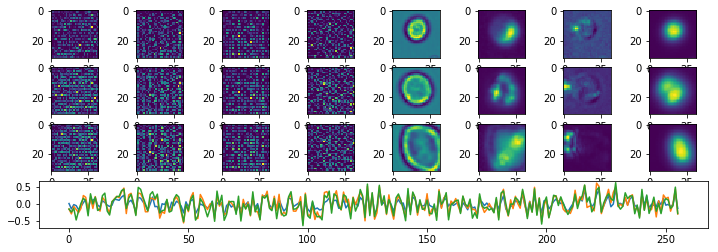

Epoch:  1 Iteration:  0 Loss:  13.4251 0.606873 0.00146082


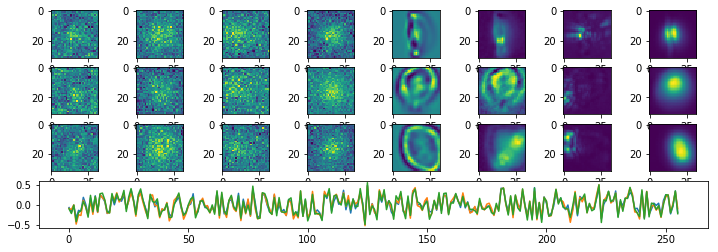

Epoch:  2 Iteration:  0 Loss:  11.1921 0.605408 0.00246376


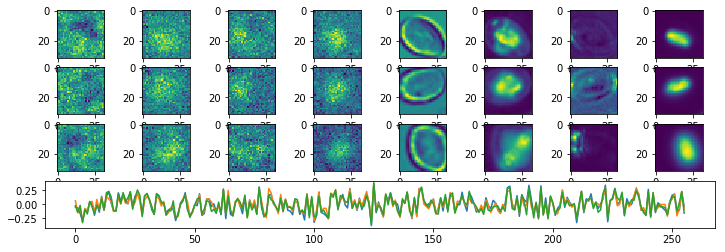

Epoch:  3 Iteration:  0 Loss:  9.10405 0.604348 8.04365e-05


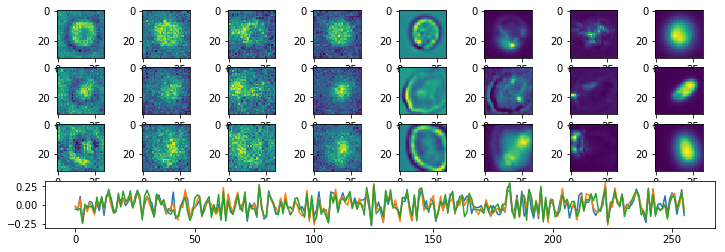

Epoch:  4 Iteration:  0 Loss:  9.56826 0.604541 0.0014264


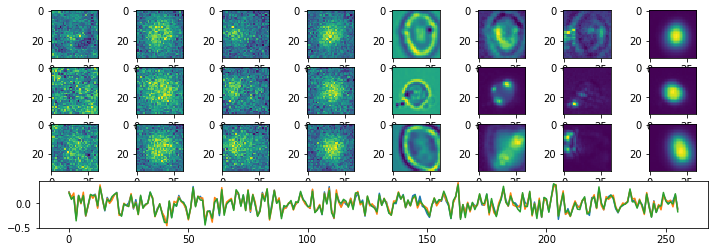

Epoch:  5 Iteration:  0 Loss:  8.9718 0.604249 0.000235558


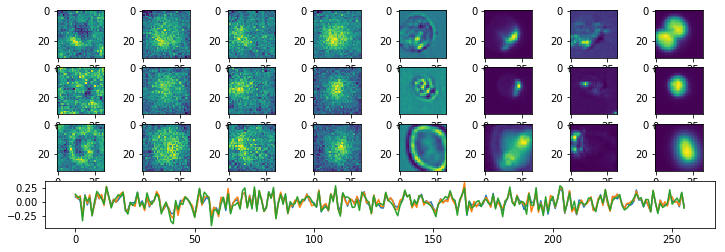

Epoch:  6 Iteration:  0 Loss:  7.60668 0.603491 0.000819474


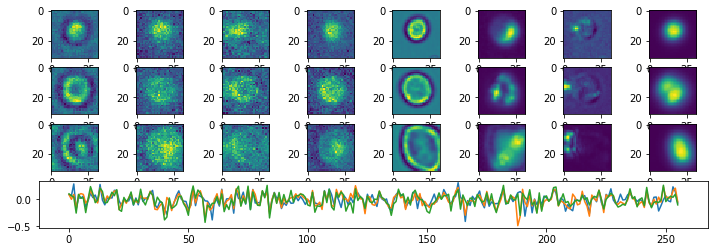

Epoch:  7 Iteration:  0 Loss:  6.91509 0.603114 0.00083518


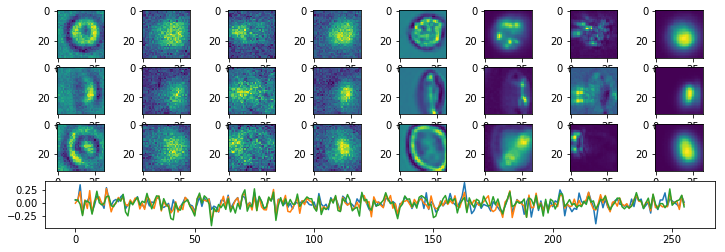

Epoch:  8 Iteration:  0 Loss:  6.48168 0.602885 0.000545293


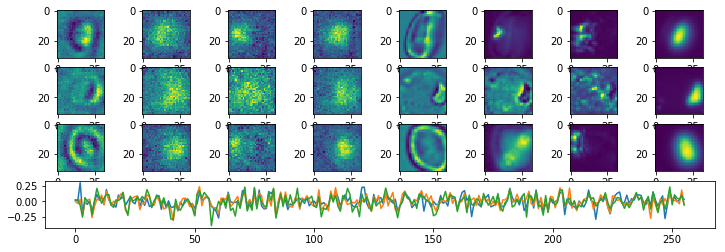

Epoch:  9 Iteration:  0 Loss:  5.89612 0.602561 0.000723422


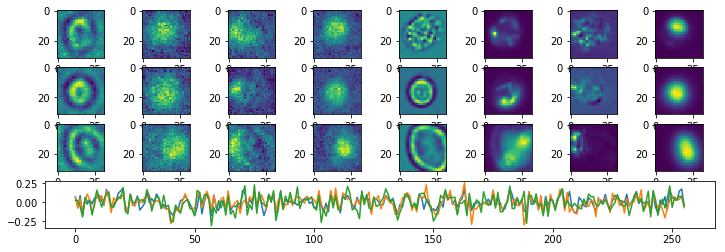

Epoch:  10 Iteration:  0 Loss:  5.52939 0.602363 0.000635326


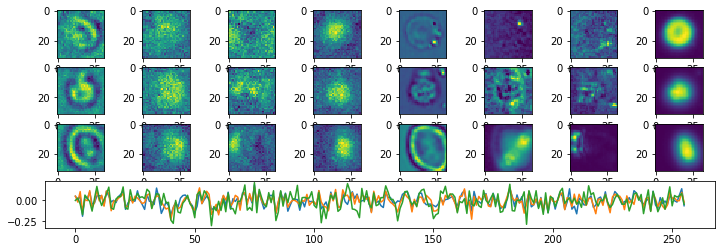

Epoch:  11 Iteration:  0 Loss:  5.21654 0.602194 0.000730544


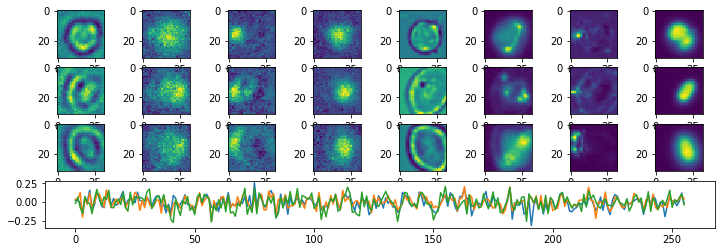

Epoch:  12 Iteration:  0 Loss:  4.99647 0.602078 0.000354737


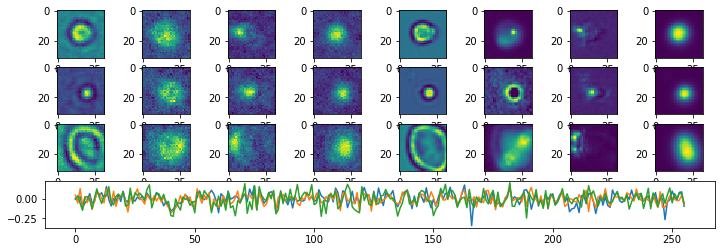

Epoch:  13 Iteration:  0 Loss:  4.70339 0.601918 0.000489771


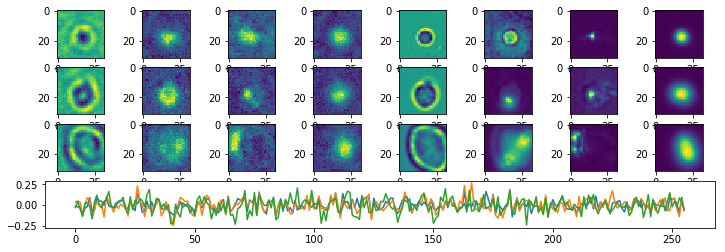

Epoch:  14 Iteration:  0 Loss:  4.49636 0.601803 0.000643224


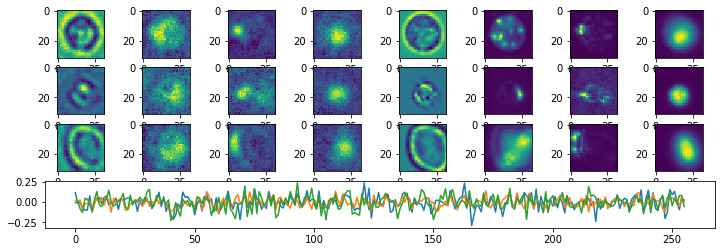

Epoch:  15 Iteration:  0 Loss:  4.28792 0.601689 0.000433892


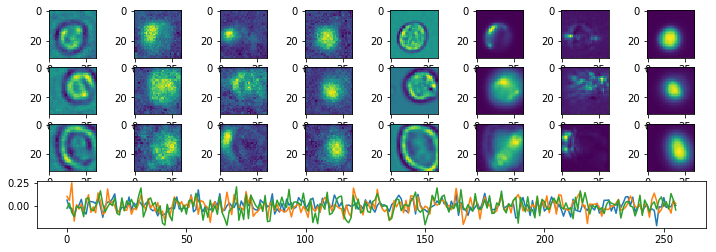

Epoch:  16 Iteration:  0 Loss:  4.10954 0.601592 0.000884086


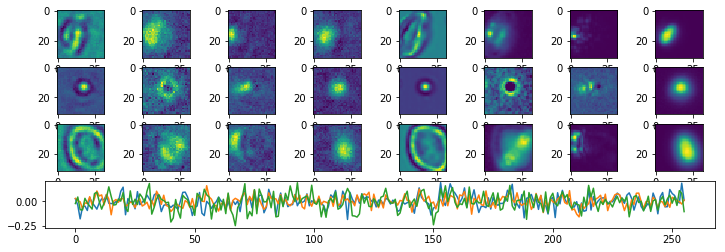

Epoch:  17 Iteration:  0 Loss:  3.91607 0.601488 0.000385106


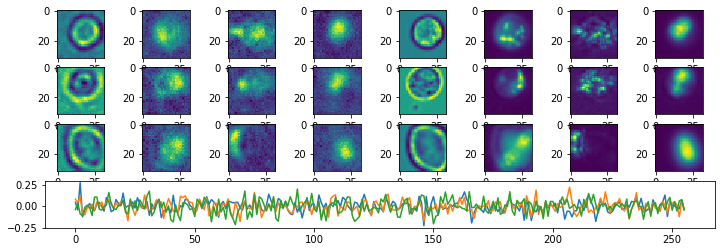

Epoch:  18 Iteration:  0 Loss:  3.78121 0.601414 0.00056836


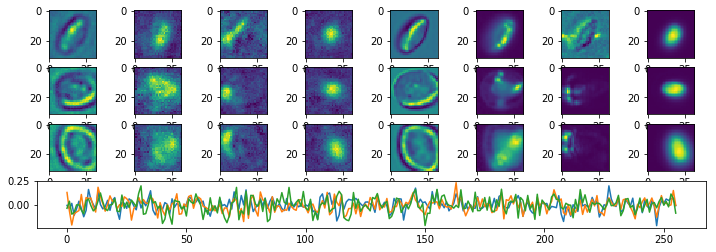

Epoch:  19 Iteration:  0 Loss:  3.65044 0.601344 0.000404119


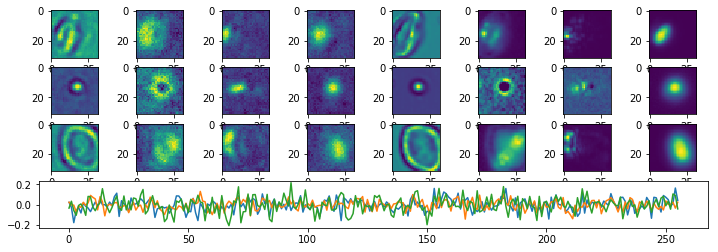

Epoch:  20 Iteration:  0 Loss:  3.54498 0.601286 0.000675827


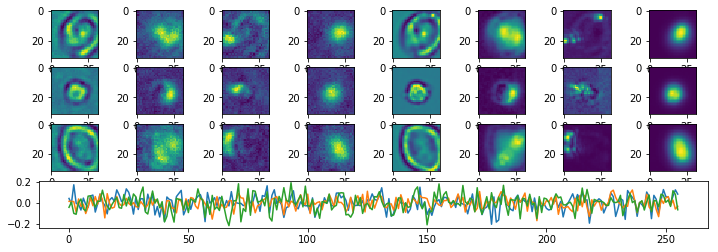

Epoch:  21 Iteration:  0 Loss:  3.45984 0.601241 0.000979453


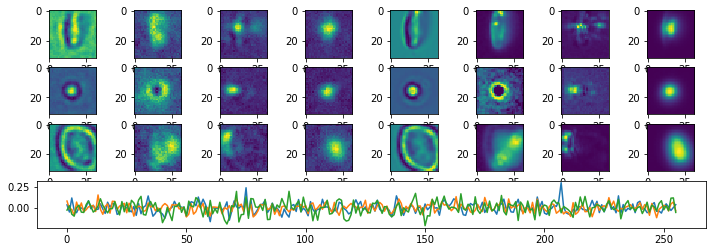

Epoch:  22 Iteration:  0 Loss:  3.33984 0.601175 0.000511974


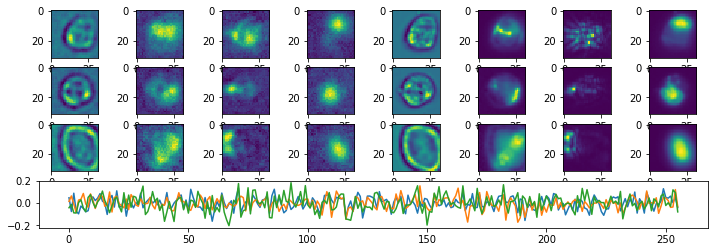

Epoch:  23 Iteration:  0 Loss:  3.24131 0.601123 0.000606


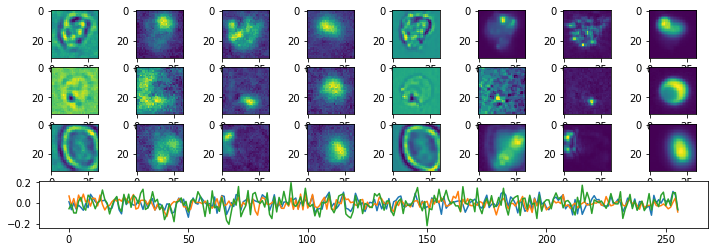

Epoch:  24 Iteration:  0 Loss:  3.17885 0.601091 5.22733e-05


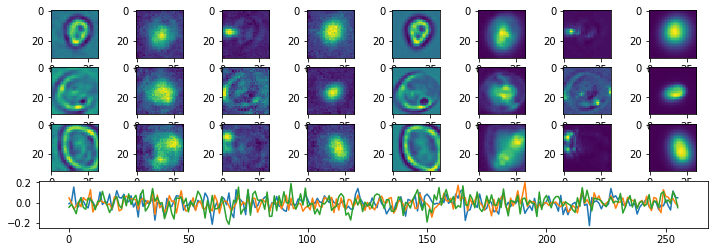

Epoch:  25 Iteration:  0 Loss:  3.08017 0.601036 0.000321299


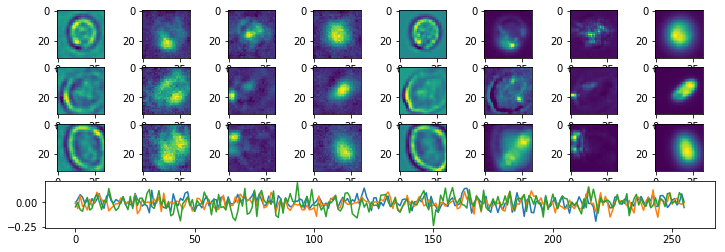

Epoch:  26 Iteration:  0 Loss:  3.01186 0.600999 0.000348032


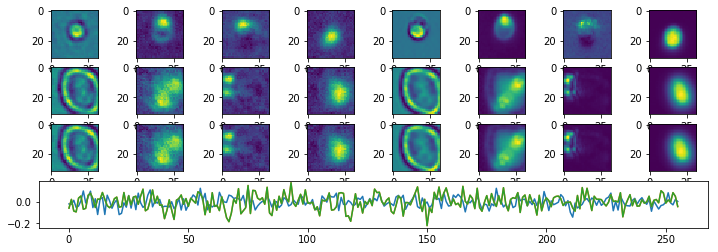

Epoch:  27 Iteration:  0 Loss:  2.99232 0.600991 0.000117749


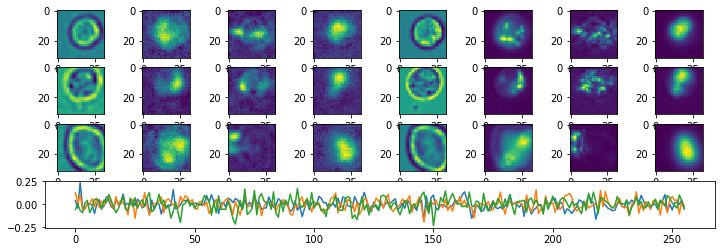

Epoch:  28 Iteration:  0 Loss:  2.88559 0.600931 0.000418305


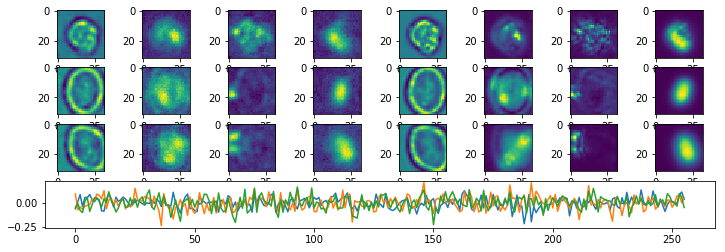

Epoch:  29 Iteration:  0 Loss:  2.81982 0.600894 0.000429213


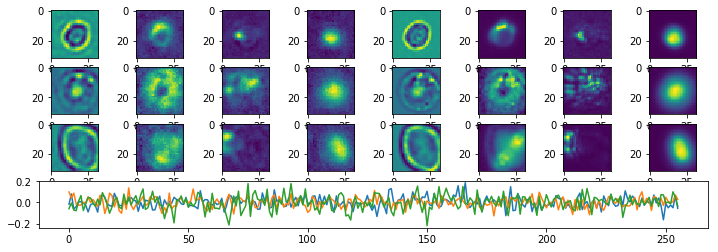

Epoch:  30 Iteration:  0 Loss:  2.7669 0.600868 6.28233e-05


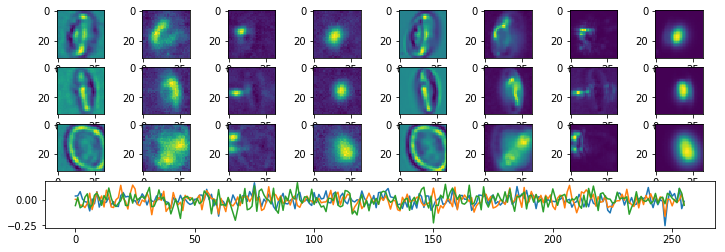

Epoch:  31 Iteration:  0 Loss:  2.71008 0.600837 0.0001387


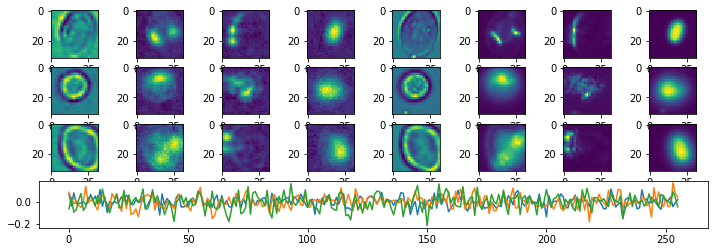

Epoch:  32 Iteration:  0 Loss:  2.68189 0.600823 0.000222176


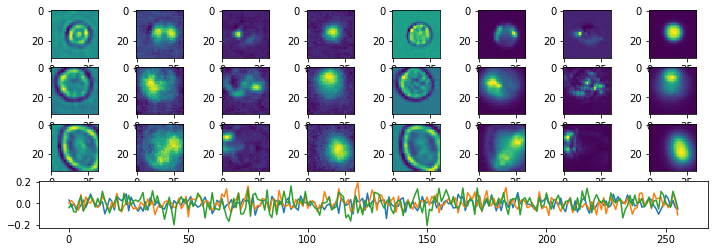

Epoch:  33 Iteration:  0 Loss:  2.62316 0.600791 9.67979e-05


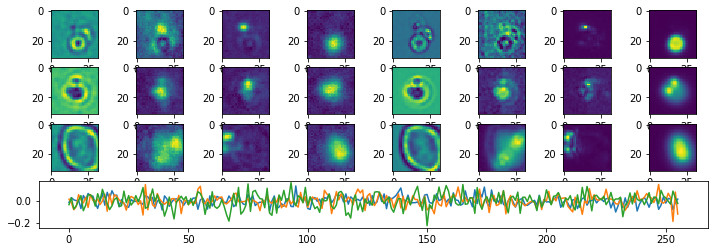

Epoch:  34 Iteration:  0 Loss:  2.57538 0.600764 0.000692874


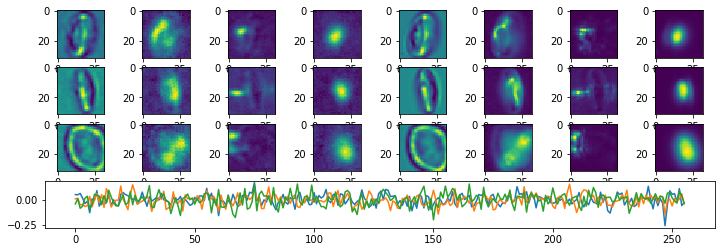

Epoch:  35 Iteration:  0 Loss:  2.51522 0.600731 0.00018248


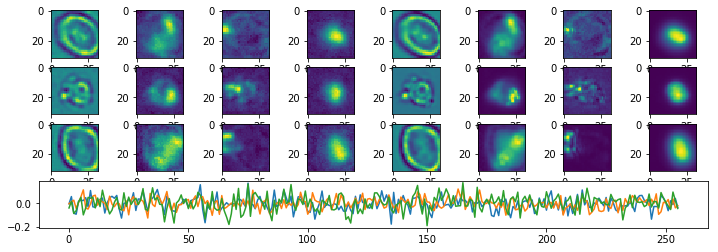

Epoch:  36 Iteration:  0 Loss:  2.47574 0.60071 0.000287652


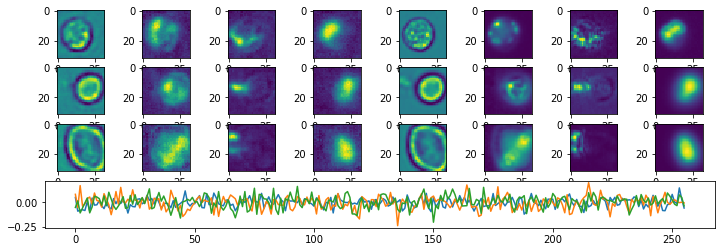

Epoch:  37 Iteration:  0 Loss:  2.44779 0.600694 0.00051865


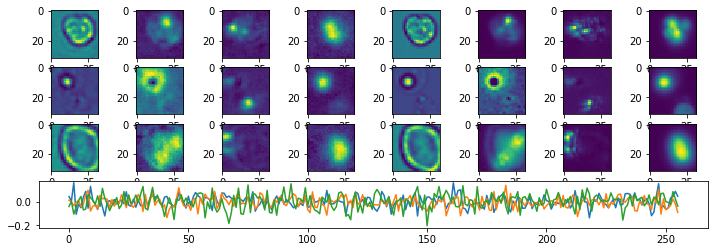

Epoch:  38 Iteration:  0 Loss:  2.39287 0.600666 0.000181884


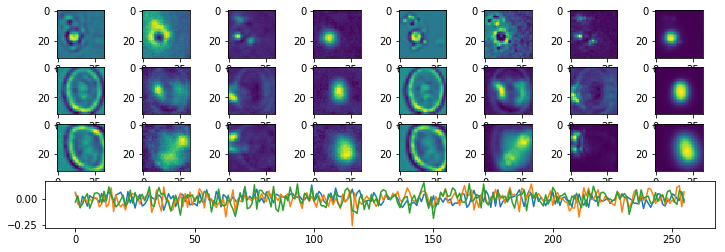

Epoch:  39 Iteration:  0 Loss:  2.36906 0.600653 0.000184029


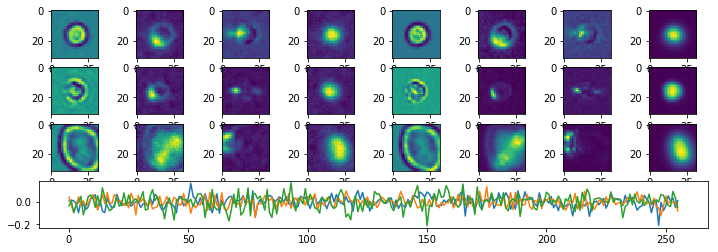

Epoch:  40 Iteration:  0 Loss:  2.33985 0.600637 0.000371188


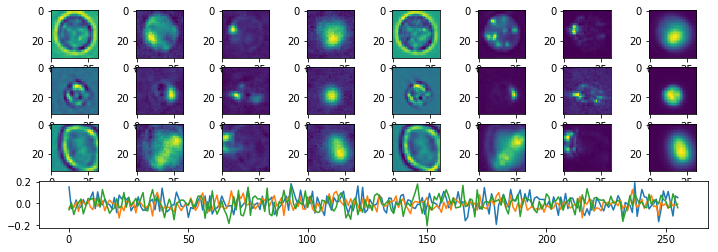

Epoch:  41 Iteration:  0 Loss:  2.36036 0.600649 0.000495732


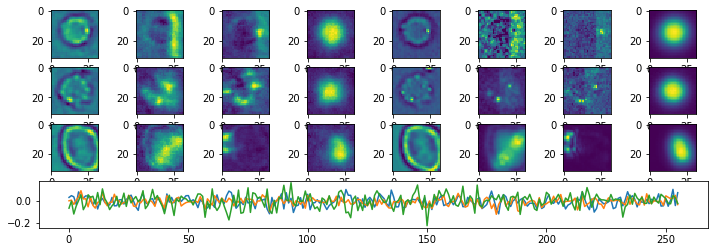

Epoch:  42 Iteration:  0 Loss:  2.2732 0.600601 0.000293732


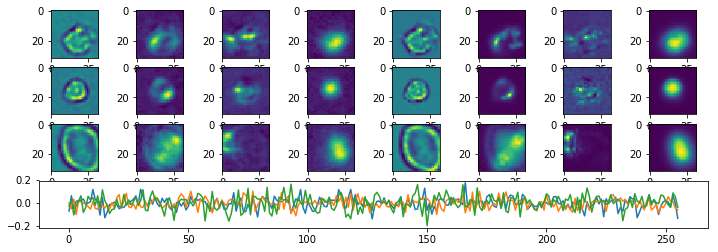

Epoch:  43 Iteration:  0 Loss:  2.29798 0.600616 0.000247419


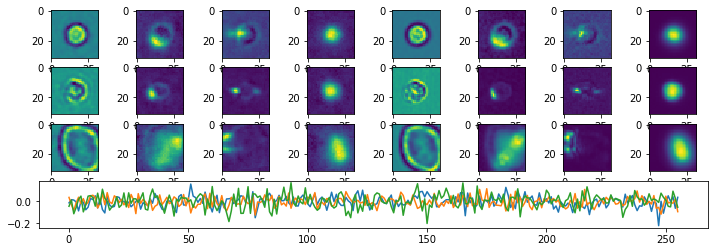

Epoch:  44 Iteration:  0 Loss:  2.23865 0.600583 0.000717044


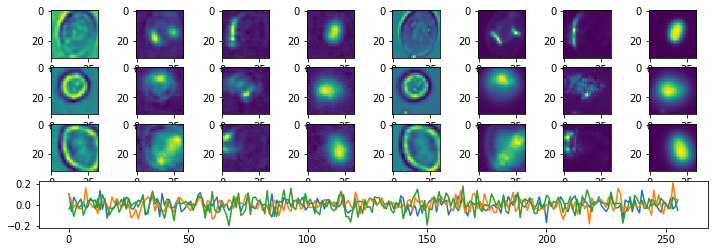

Epoch:  45 Iteration:  0 Loss:  2.19238 0.600558 0.000380397


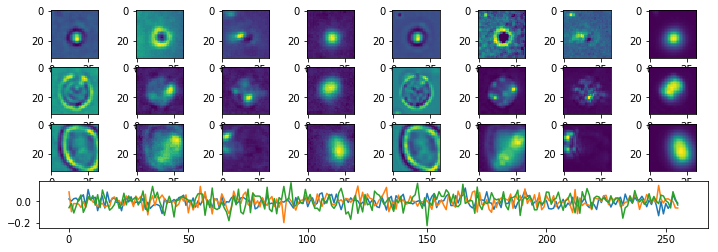

Epoch:  46 Iteration:  0 Loss:  2.26309 0.600596 0.000506222


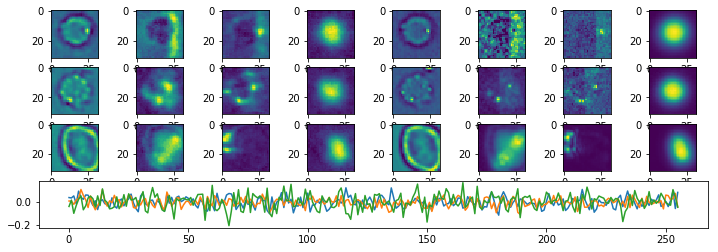

Epoch:  47 Iteration:  0 Loss:  2.16525 0.600544 0.00041005


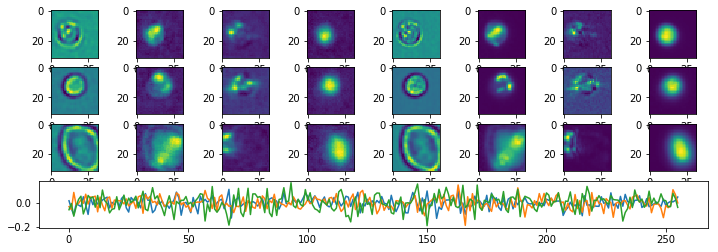

Epoch:  48 Iteration:  0 Loss:  2.14802 0.600534 0.00048238


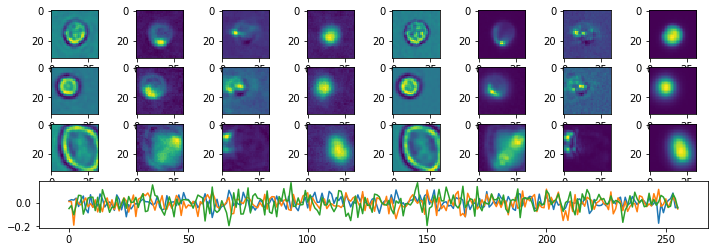

Epoch:  49 Iteration:  0 Loss:  2.11629 0.600517 5.09322e-05


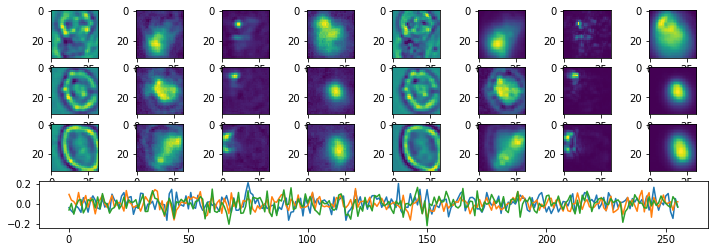

Epoch:  50 Iteration:  0 Loss:  2.09276 0.600503 0.000257224


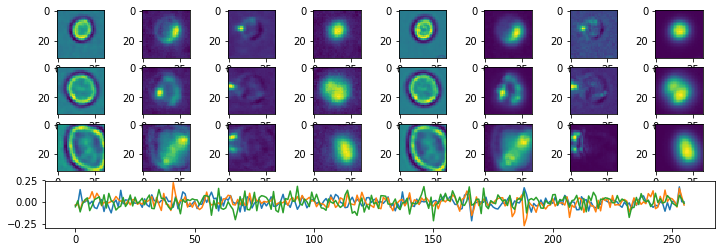

Epoch:  51 Iteration:  0 Loss:  2.07546 0.600494 0.00029847


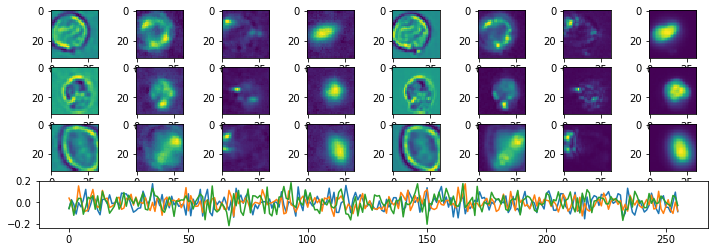

Epoch:  52 Iteration:  0 Loss:  34.2045 0.618067 0.00496709


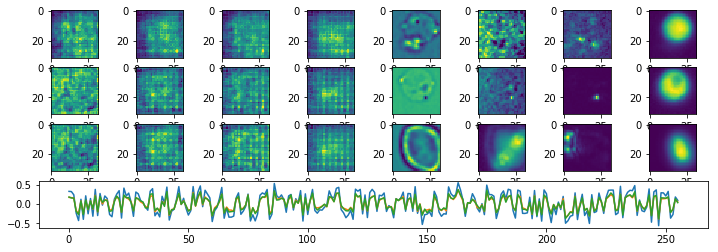

Epoch:  53 Iteration:  0 Loss:  4.27002 0.601698 0.000487894


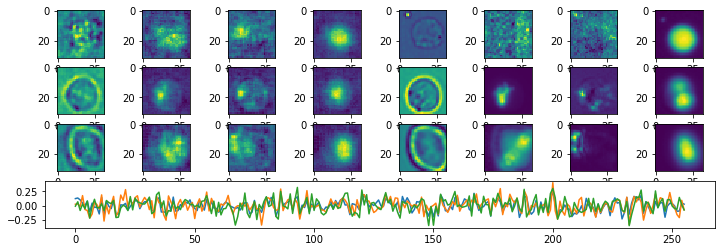

Epoch:  54 Iteration:  0 Loss:  2.83212 0.60091 0.000577092


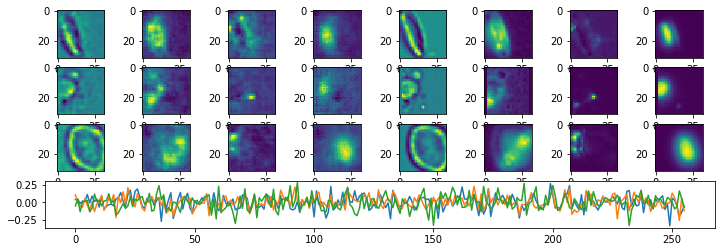

Epoch:  55 Iteration:  0 Loss:  2.53696 0.600747 0.000529557


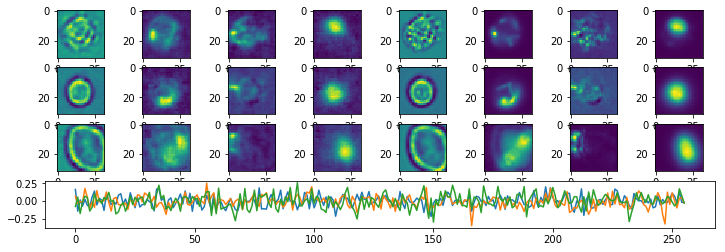

Epoch:  56 Iteration:  0 Loss:  2.41647 0.600682 0.000440985


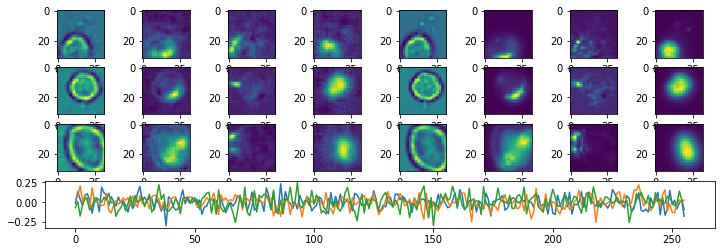

Epoch:  57 Iteration:  0 Loss:  2.33334 0.600635 0.000425488


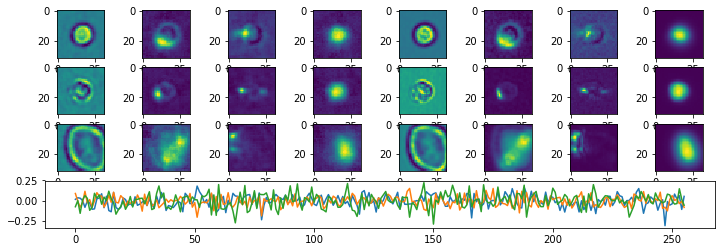

Epoch:  58 Iteration:  0 Loss:  2.28367 0.600609 0.000304818


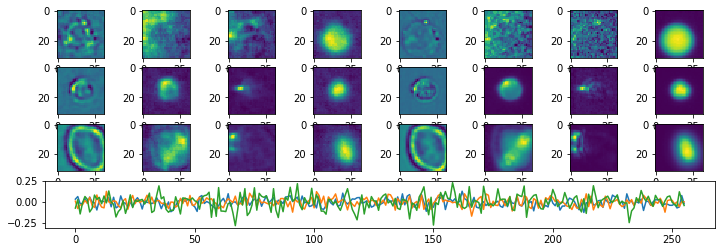

Epoch:  59 Iteration:  0 Loss:  2.24003 0.600585 0.000374436


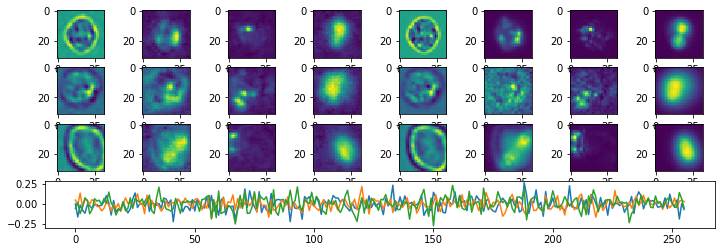

Done


In [6]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0,1,2,4]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-04-17-Chs-0-1-2-4_32_mmFromTifs3"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4